# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.linear_model import LinearRegression

## Loading Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(10)

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
5,6,Tier 2,Executive,Non-Metro,"54,340.00",4,73,31,"59,950.89"
6,7,Tier 2,Executive,Non-Metro,"60,298.00",1,42,46,"66,602.34"
7,8,Tier 3,Executive,Non-Metro,"49,944.00",2,56,37,"57,768.44"
8,9,Tier 1,Executive,Metro,"53,124.00",4,40,37,"70,083.30"
9,10,Tier 3,Executive,Non-Metro,"51,141.00",1,47,60,"85,648.48"


### train dataset has 3 categorical variables, we have to turn them into numeric variables and the column named "S.No." is unnecessary so it is better to drop it.

In [4]:
# dropping the column 'S.No.'
train1=train.drop(['S.No.'],axis=1)

In [5]:
train1

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1334,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1335,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1336,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [6]:
# Now transforming the categorical variables into numerical variables.
cat_columns=["College",'Role','City type']
train2=pd.get_dummies(columns=["College",'Role','City type'],data=train1)
train2

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,"55,523.00",3,66,19,"71,406.58",1,0,0,0,1,0,1
1,"57,081.00",1,84,18,"68,005.87",0,1,0,1,0,1,0
2,"60,347.00",2,52,28,"76,764.02",0,1,0,1,0,1,0
3,"49,010.00",2,81,33,"82,092.39",0,0,1,1,0,1,0
4,"57,879.00",4,74,32,"73,878.10",0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,"59,661.00",4,68,50,"69,712.40",0,0,1,1,0,1,0
1334,"53,714.00",1,67,18,"69,298.75",1,0,0,1,0,0,1
1335,"61,957.00",1,47,18,"66,397.77",0,1,0,1,0,0,1
1336,"53,203.00",3,69,21,"64,044.38",1,0,0,1,0,0,1


In [7]:
test.head(10)

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773
5,Tier 2,Executive,Non-Metro,0,1,0,0,54340,4,73,31,59950.89225
6,Tier 2,Executive,Non-Metro,0,1,0,0,60298,1,42,46,66602.33931
7,Tier 3,Executive,Non-Metro,0,0,0,0,49944,2,56,37,57768.43504
8,Tier 1,Executive,Metro,1,0,0,1,53124,4,40,37,70083.30436
9,Tier 3,Executive,Non-Metro,0,0,0,0,51141,1,47,60,85648.48147


### It can be seen in test dataset there are also 3 categorical variable, but here the dataset is already divided in dummy variables like The colleges in tier 1 are denoted by 1 in the column College_T1, colleges in tier 2 are denoted by 1 in the column College_T2, and when both College_T1 and College_T2 column have 0 value in a row then it denotes College of Tier 3.

### Similarly for the column name 'Role' there are two categories so in the column 'Role_Manager' 1 denotes manager post and 0 denotes the Executive post.

### And for the Column named 'City type ' there are also 2 categories and in the column City_Metro 1 denotes the city with metro rail and 0 denotes the non-metro type city.

### So We can conclude from the above discussion that it is better to drop the columns named college, Role, city_type.

In [8]:
# dropping the unnecessary colmns from test data.
columns=['College','Role','City type']
test1=test.drop(columns, axis=1)
test1

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,1,0,1,0,55523,3,66,19,71406.57653
1,0,1,0,1,57081,1,84,18,68005.87063
2,0,1,0,1,60347,2,52,28,76764.02028
3,0,0,0,1,49010,2,81,33,82092.38688
4,0,0,0,1,57879,4,74,32,73878.09773
...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50,69712.40366
1334,1,0,0,0,53714,1,67,18,69298.75010
1335,0,1,0,0,61957,1,47,18,66397.77069
1336,1,0,0,0,53203,3,69,21,64044.38295


In [9]:
train2

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,"55,523.00",3,66,19,"71,406.58",1,0,0,0,1,0,1
1,"57,081.00",1,84,18,"68,005.87",0,1,0,1,0,1,0
2,"60,347.00",2,52,28,"76,764.02",0,1,0,1,0,1,0
3,"49,010.00",2,81,33,"82,092.39",0,0,1,1,0,1,0
4,"57,879.00",4,74,32,"73,878.10",0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,"59,661.00",4,68,50,"69,712.40",0,0,1,1,0,1,0
1334,"53,714.00",1,67,18,"69,298.75",1,0,0,1,0,0,1
1335,"61,957.00",1,47,18,"66,397.77",0,1,0,1,0,0,1
1336,"53,203.00",3,69,21,"64,044.38",1,0,0,1,0,0,1


### Now we can see clearly that the tarining dataset and test dataset have diifferent number of columns so we have to make them equal in no and attribute before using them to build the model. Firstly, we have to drop unnecessary columns from the training dataset and then rearrange the columns to order them and rename them to have same column name.

In [10]:
# Dropping unnecessary columns from training data

d_col=['College_Tier 3','Role_Executive','City type_Non-Metro']

train3=train2.drop(d_col,axis=1)
train3

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
0,"55,523.00",3,66,19,"71,406.58",1,0,1,0
1,"57,081.00",1,84,18,"68,005.87",0,1,0,1
2,"60,347.00",2,52,28,"76,764.02",0,1,0,1
3,"49,010.00",2,81,33,"82,092.39",0,0,0,1
4,"57,879.00",4,74,32,"73,878.10",0,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,"59,661.00",4,68,50,"69,712.40",0,0,0,1
1334,"53,714.00",1,67,18,"69,298.75",1,0,0,0
1335,"61,957.00",1,47,18,"66,397.77",0,1,0,0
1336,"53,203.00",3,69,21,"64,044.38",1,0,0,0


In [11]:
train3.head(0)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro


In [12]:
train4=train3[['College_Tier 1','College_Tier 2','Role_Manager','City type_Metro','Graduation marks','Previous job changes','Exp (Months)','Previous CTC','CTC']]
train4

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC
0,1,0,1,0,66,3,19,"55,523.00","71,406.58"
1,0,1,0,1,84,1,18,"57,081.00","68,005.87"
2,0,1,0,1,52,2,28,"60,347.00","76,764.02"
3,0,0,0,1,81,2,33,"49,010.00","82,092.39"
4,0,0,0,1,74,4,32,"57,879.00","73,878.10"
...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,68,4,50,"59,661.00","69,712.40"
1334,1,0,0,0,67,1,18,"53,714.00","69,298.75"
1335,0,1,0,0,47,1,18,"61,957.00","66,397.77"
1336,1,0,0,0,69,3,21,"53,203.00","64,044.38"


In [13]:
test1.head(0)

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC


In [14]:
# rearranging the test dataset
test2 =test1[['College_T1','College_T2','Role_Manager','City_Metro','Graduation marks','previous job changes','Exp','previous CTC','Actual CTC']]
test2

,College_T1,College_T2,Role_Manager,City_Metro,Graduation marks,previous job changes,Exp,previous CTC,Actual CTC
0,1,0,1,0,66,3,19,55523,71406.57653
1,0,1,0,1,84,1,18,57081,68005.87063
2,0,1,0,1,52,2,28,60347,76764.02028
3,0,0,0,1,81,2,33,49010,82092.38688
4,0,0,0,1,74,4,32,57879,73878.09773
...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,68,4,50,59661,69712.40366
1334,1,0,0,0,67,1,18,53714,69298.75010
1335,0,1,0,0,47,1,18,61957,66397.77069
1336,1,0,0,0,69,3,21,53203,64044.38295


In [15]:
train4.head(0)

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC


In [16]:
test2.head(0)

,College_T1,College_T2,Role_Manager,City_Metro,Graduation marks,previous job changes,Exp,previous CTC,Actual CTC


In [17]:
test2.columns=['College_Tier 1','College_Tier 2','Role_Manager','City type_Metro','Graduation marks','Previous job changes','Exp (Months)','Previous CTC','CTC']

In [18]:
test2

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC
0,1,0,1,0,66,3,19,55523,71406.57653
1,0,1,0,1,84,1,18,57081,68005.87063
2,0,1,0,1,52,2,28,60347,76764.02028
3,0,0,0,1,81,2,33,49010,82092.38688
4,0,0,0,1,74,4,32,57879,73878.09773
...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,68,4,50,59661,69712.40366
1334,1,0,0,0,67,1,18,53714,69298.75010
1335,0,1,0,0,47,1,18,61957,66397.77069
1336,1,0,0,0,69,3,21,53203,64044.38295


In [19]:
train4

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC
0,1,0,1,0,66,3,19,"55,523.00","71,406.58"
1,0,1,0,1,84,1,18,"57,081.00","68,005.87"
2,0,1,0,1,52,2,28,"60,347.00","76,764.02"
3,0,0,0,1,81,2,33,"49,010.00","82,092.39"
4,0,0,0,1,74,4,32,"57,879.00","73,878.10"
...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,68,4,50,"59,661.00","69,712.40"
1334,1,0,0,0,67,1,18,"53,714.00","69,298.75"
1335,0,1,0,0,47,1,18,"61,957.00","66,397.77"
1336,1,0,0,0,69,3,21,"53,203.00","64,044.38"


### Now we have our 2 datasets in same order

### Let's see some characteristics and descriptive statistics of our datasets.

In [20]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College_Tier 1        1338 non-null   uint8 
 1   College_Tier 2        1338 non-null   uint8 
 2   Role_Manager          1338 non-null   uint8 
 3   City type_Metro       1338 non-null   uint8 
 4   Graduation marks      1338 non-null   int64 
 5   Previous job changes  1338 non-null   int64 
 6   Exp (Months)          1338 non-null   int64 
 7   Previous CTC          1338 non-null   object
 8   CTC                   1338 non-null   object
dtypes: int64(3), object(2), uint8(4)
memory usage: 57.6+ KB


### Note that here two columns Previous CTC and CTC are of objective datatype i.e. the data is in string type but we want the data in float type, so let's change it into float type.

In [21]:
# Now, first we have to remove the commas in this two columns and then we can convert them into float.

train4['Previous CTC']=train4['Previous CTC'].str.replace(',','')
train4['CTC']=train4['CTC'].str.replace(',','')
train4

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC
0,1,0,1,0,66,3,19,55523.00,71406.58
1,0,1,0,1,84,1,18,57081.00,68005.87
2,0,1,0,1,52,2,28,60347.00,76764.02
3,0,0,0,1,81,2,33,49010.00,82092.39
4,0,0,0,1,74,4,32,57879.00,73878.10
...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,68,4,50,59661.00,69712.40
1334,1,0,0,0,67,1,18,53714.00,69298.75
1335,0,1,0,0,47,1,18,61957.00,66397.77
1336,1,0,0,0,69,3,21,53203.00,64044.38


In [22]:
train4['Previous CTC']=train4['Previous CTC'].astype('float')
train4['CTC']=train4['CTC'].astype('float')

l=['College_Tier 1','College_Tier 2','Role_Manager','City type_Metro']
train4[l]=train4[l].astype('int64')

In [23]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College_Tier 1        1338 non-null   int64  
 1   College_Tier 2        1338 non-null   int64  
 2   Role_Manager          1338 non-null   int64  
 3   City type_Metro       1338 non-null   int64  
 4   Graduation marks      1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   Previous CTC          1338 non-null   float64
 8   CTC                   1338 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [24]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College_Tier 1        1338 non-null   int64  
 1   College_Tier 2        1338 non-null   int64  
 2   Role_Manager          1338 non-null   int64  
 3   City type_Metro       1338 non-null   int64  
 4   Graduation marks      1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   Previous CTC          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 94.2 KB


In [25]:
# Renaming the final datasets
train_f=train4
test_f=test2

In [26]:
train_f.describe(include='all')

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.485052,0.272048,0.204783,0.505232,59.890882,2.525411,39.207025,55581.762332,75459.339036
std,0.499963,0.445181,0.403694,0.500160,14.894696,1.123502,14.049960,6685.600553,12551.280147
min,0.000000,0.000000,0.000000,0.000000,35.000000,1.000000,18.000000,36990.000000,53020.320000
25%,0.000000,0.000000,0.000000,0.000000,47.000000,2.000000,27.000000,50547.000000,66905.067500
50%,0.000000,0.000000,0.000000,1.000000,60.000000,3.000000,39.000000,55293.500000,73112.640000
75%,1.000000,1.000000,0.000000,1.000000,73.000000,4.000000,51.000000,60150.500000,80747.175000
max,1.000000,1.000000,1.000000,1.000000,85.000000,4.000000,64.000000,77911.000000,123416.990000


In [27]:
test_f.describe(include='all')

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.485052,0.272048,0.204783,0.505232,59.890882,2.525411,39.207025,55581.762332,75459.338993
std,0.499963,0.445181,0.403694,0.500160,14.894696,1.123502,14.049960,6685.600553,12551.280262
min,0.000000,0.000000,0.000000,0.000000,35.000000,1.000000,18.000000,36990.000000,53020.319030
25%,0.000000,0.000000,0.000000,0.000000,47.000000,2.000000,27.000000,50547.000000,66905.070033
50%,0.000000,0.000000,0.000000,1.000000,60.000000,3.000000,39.000000,55293.500000,73112.640485
75%,1.000000,1.000000,0.000000,1.000000,73.000000,4.000000,51.000000,60150.500000,80747.178420
max,1.000000,1.000000,1.000000,1.000000,85.000000,4.000000,64.000000,77911.000000,123416.994300


### We can clearly see the descriptive stats for the training and testing datasets and also we can see that there are no NAN(or null) values in the datasets 

### Now the datasets are finally ok to go for model building.

In [28]:
# Now splitting the training dataset(train_f)
X_train=train_f.drop(['CTC'],axis=1)
Y_train=train_f['CTC']

# Now splitting the testing dataset(test_f)
X_test=test_f.drop(['CTC'],axis=1)
Y_test=test_f['CTC']

### Now let's standardize non-categorical variables for ease of computation and better accuracy.

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Now, let's do Linear Regression

### First let's create a Linear regression model

In [30]:
LR_model=LinearRegression()

### After creation, now we have to train the model on the training dataset.

In [31]:
LR_model.fit(X_train,Y_train) # we have fitted the training data in the model

LinearRegression()

### Now our model is ready for prediction

### Now based on the values of test dataset of featuure variables we are going to predict the values of CTC in test dataset.

In [32]:
Y_pred=LR_model.predict(X_test) 

In [33]:
print(LR_model.intercept_, LR_model.coef_, LR_model.score(X_train,Y_train))

75459.33903587444 [2328.8244058  -370.37410293 7812.57269413 2040.17695777  -54.38038373
  -32.6156385  3636.74597385 3018.04301848] 0.6081873190299324


In [34]:
from sympy import symbols, exp, Eq, solve

y, x0, x1, x2, x3, x4, x5, x6, x7, x8 = symbols('y, x0, x1, x2, x3, x4, x5, x6, x7, x8')
expression= 75459.339+ 2328.824*x1 + -370.374*x2 + 7812.572*x3 + 2040.177*x4 + -54.380*x5 + -32.615*x6 + 3636.746*x7 + 3018.043*x8
expression
eq_r=Eq(expression,y)
eq_r

Eq(2328.824*x1 - 370.374*x2 + 7812.572*x3 + 2040.177*x4 - 54.38*x5 - 32.615*x6 + 3636.746*x7 + 3018.043*x8 + 75459.339, y)

##### The equation above is the regression equation

### Let's create a dataframe of two columns Predicted CTC value and Actual CTC value for test dataset

In [35]:
Reg_df=pd.DataFrame({'Predicted_CTC_Value':Y_pred,"Original_CTC_Value":Y_test})
Reg_df

,Predicted_CTC_Value,Original_CTC_Value
0,86123.937724,71406.57653
1,65789.546863,68005.87063
2,69941.690699,76764.02028
3,66843.038413,82092.38688
4,70556.761579,73878.09773
...,...,...
1333,76044.346272,69712.40366
1334,65742.551429,69298.75010
1335,64046.074943,66397.77069
1336,66223.222142,64044.38295


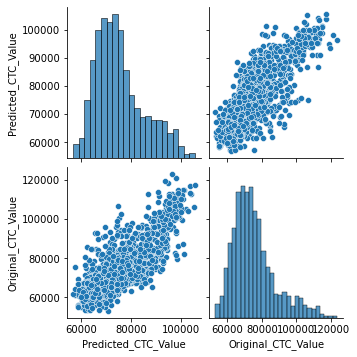

In [36]:
sns.pairplot(Reg_df)

<AxesSubplot:xlabel='Predicted_CTC_Value', ylabel='Original_CTC_Value'>

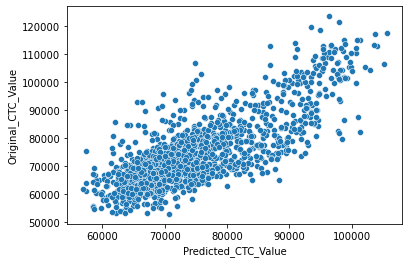

In [37]:
sns.scatterplot(x=Reg_df['Predicted_CTC_Value'],y=Reg_df['Original_CTC_Value'])

### Let's find R2-Score, Mean Absolute Error, Mean Squared Error and Root Mean Squared Error

In [38]:
print("The R2-score(R square value) for the model: ",r2_score(Reg_df['Original_CTC_Value'],Reg_df['Predicted_CTC_Value']),'\n','Mean Absolute Error:',mae(Reg_df['Original_CTC_Value'],Reg_df['Predicted_CTC_Value']),'\n','The Mean Squared error',mse(Reg_df['Original_CTC_Value'],Reg_df['Predicted_CTC_Value']),'\n','The RMSE value:',(mse(Reg_df['Original_CTC_Value'],Reg_df['Predicted_CTC_Value']))**.5)

The R2-score(R square value) for the model:  0.6081873160460818 
 Mean Absolute Error: 6159.175550813232 
 The Mean Squared error 61677937.04476765 
 The RMSE value: 7853.5302281692175


# Our model doesn't give a good fit

### Submitted by,
## HRITTIK BANERJEE
##### DATA SCIENCE and ML intern at START-TECH